In [1]:
import numpy as np
import pandas as pd




df = pd.read_csv("../cleaned-data.csv")
df = df.drop(columns=['Unnamed: 0'], axis=1)
df["START DATE"] = pd.to_datetime(df["START DATE"])
df["END DATE"] = pd.to_datetime(df["END DATE"])
df["coverage_period"] = df["END DATE"] - df["START DATE"]


df

/Users/arminkhayyer/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AMOUNT,BIOGUIDE_ID,CATEGORY,END DATE,OFFICE,PAYEE,PROGRAM,PURPOSE,QUARTER,START DATE,YEAR,coverage_period
0,20000.01,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,ALTHOUSE JOSHUA S,GENERAL EXPENDITURES,CONSERVATIVE OUTREACH DIRECTOR,2017Q3,2017-07-01,2017,91 days
1,27500.01,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,ANDRES DOUGLAS R,GENERAL EXPENDITURES,PRESS SECRETARY,2017Q3,2017-07-01,2017,91 days
2,32499.99,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,ANDREWS THOMAS S,GENERAL EXPENDITURES,MEMBER SERVICES DIRECTOR,2017Q3,2017-07-01,2017,91 days
3,41250.00,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,ANTELL GEOFFREY,GENERAL EXPENDITURES,ASST TO THE SPEAKER FOR POLICY,2017Q3,2017-07-01,2017,91 days
4,13250.01,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BENJAMIN WILLIAM C.,GENERAL EXPENDITURES,SYSTEM ADMINISTRATOR,2017Q3,2017-07-01,2017,91 days
5,33750.00,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BLAKE KRISTENE,GENERAL EXPENDITURES,DIR OF ADMIN OPERATIONS,2017Q3,2017-07-01,2017,91 days
6,5862.75,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BLANKENSHIP APRIL L.,GENERAL EXPENDITURES,FINANCIAL ADMINISTRATOR,2017Q3,2017-07-01,2017,91 days
7,43125.00,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BUCK BRENDAN K,GENERAL EXPENDITURES,COUNSELOR TO THE SPEAKER,2017Q3,2017-07-01,2017,91 days
8,43125.00,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BURKS JONATHAN,GENERAL EXPENDITURES,CHIEF OF STAFF,2017Q3,2017-07-01,2017,91 days
9,24999.99,NaN,PERSONNEL COMPENSATION,2017-09-30,OFFICE OF THE SPEAKER,BUSH NICHOLAS J,GENERAL EXPENDITURES,SHARED EMPLOYEE,2017Q3,2017-07-01,2017,91 days


question 1. What is the most expensive payee?
we have several payees,it's not good to just group buy that. what else we can do we can find the purpose of the largest amount payed. 

In [2]:
max_amount = df.loc[df.AMOUNT == max(df.AMOUNT), :]
print(max_amount)

            AMOUNT BIOGUIDE_ID            CATEGORY   END DATE  \
184760  6789603.47         NaN  PERSONNEL BENEFITS 2017-12-31   

                          OFFICE PAYEE                   PROGRAM PURPOSE  \
184760  GOVERNMENT CONTRIBUTIONS        GOVERNMENT CONTRIBUTIONS    FERS   

       QUARTER START DATE  YEAR coverage_period  
184760  2017Q4 2017-12-01  2017         30 days  


question 2. Which year was the most expensive year for the House?

In [3]:

print(df.groupby(["YEAR"]).aggregate(["mean", "count", "sum"]))
print(df.groupby(["QUARTER"]).aggregate(["mean", "count", "sum"]))


           AMOUNT                      
             mean   count           sum
YEAR                                   
2010  2435.586580  413389  1.006845e+09
2011  2702.034817  386063  1.043156e+09
2012  2837.021456  351784  9.980188e+08
2013  2734.662510  335498  9.174738e+08
2014  2846.581721  325800  9.274163e+08
2015  2784.453582  333007  9.272425e+08
2016  2824.880631  334722  9.455497e+08
2017  3110.998444  294891  9.174054e+08
              AMOUNT                        YEAR                   
                mean   count           sum  mean   count        sum
QUARTER                                                            
2010Q1   2177.523850  132800  2.891752e+08  2010  132800  266928000
2010Q2   2295.183955  126242  2.897486e+08  2010  126242  253746420
2010Q3   2309.436259   65527  1.513304e+08  2010   65527  131709270
2010Q4   3114.056416   88820  2.765905e+08  2010   88820  178528200
2011Q1   2493.853667  105204  2.623634e+08  2011  105204  211565244
2011Q2   2509.15

question 3. Graphic How expenses changed during time?

In [4]:
df.boxplot(column= ["AMOUNT"], by= ["YEAR"], showbox=True)

question 4. Which office was the most expensive in each year?

In [5]:
max_OFFICE = df.groupby(["YEAR", "OFFICE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("the most expensive office in year {} is ".format(i), max_OFFICE[i].idxmax(), "with total expenditure of", max_OFFICE[i].max())

the most expensive office in year 2010 is  HOUSE INFORMATION RESOURCES with total expenditure of 35293000.74999965
the most expensive office in year 2011 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 140495758.15000015
the most expensive office in year 2012 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 120877032.13999988
the most expensive office in year 2013 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109105027.95000017
the most expensive office in year 2014 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 109211560.04999961
the most expensive office in year 2015 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 87561524.60000005
the most expensive office in year 2016 is  CHIEF ADMIN OFCR OF THE HOUSE with total expenditure of 126043024.37000008
the most expensive office in year 2017 is  GOVERNMENT CONTRIBUTIONS with total expenditure of 187732923.96000028


question 6. What is the most commun purpose to spend money in House?

In [6]:
#yearly Federal Employees Retirement System as FERS
max_Purpose = df.groupby(["YEAR", "PURPOSE"])["AMOUNT"].sum()
for i in range(2010, 2018):
    print("the most expensive PURPOSE in year {} is ".format(i), max_Purpose[i].idxmax(), "with total expenditure of", max_Purpose[i].max())

the most expensive PURPOSE in year 2010 is  CHIEF OF STAFF with total expenditure of 44299411.83999991
the most expensive PURPOSE in year 2011 is  CHIEF OF STAFF with total expenditure of 54147818.38
the most expensive PURPOSE in year 2012 is  CHIEF OF STAFF with total expenditure of 53421922.74999992
the most expensive PURPOSE in year 2013 is  CHIEF OF STAFF with total expenditure of 56105506.47999993
the most expensive PURPOSE in year 2014 is  CHIEF OF STAFF with total expenditure of 57171284.24000005
the most expensive PURPOSE in year 2015 is  CHIEF OF STAFF with total expenditure of 58300528.569999985
the most expensive PURPOSE in year 2016 is  CHIEF OF STAFF with total expenditure of 59641340.92999996
the most expensive PURPOSE in year 2017 is  FERS with total expenditure of 57445787.989999995


In [7]:
# overall
df.groupby(["PURPOSE"])["AMOUNT"].sum().idxmax()


'CHIEF OF STAFF'

question 7. How much was the total expenditure for each purpose? we have so many purposes, it's not a good idea to check for all of those. instead we can check for the top 5 or 10 

In [8]:
df.groupby(["PURPOSE"])["AMOUNT"].sum().nlargest(5)


PURPOSE
CHIEF OF STAFF                  4.292033e+08
STAFF ASSISTANT                 2.589278e+08
LEGISLATIVE ASSISTANT           2.293613e+08
TECHNOLOGY SERVICE CONTRACTS    2.243267e+08
DISTRICT DIRECTOR               2.058145e+08
Name: AMOUNT, dtype: float64

question 8. Graphic of total expenses in each year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a580358>]],
      dtype=object)

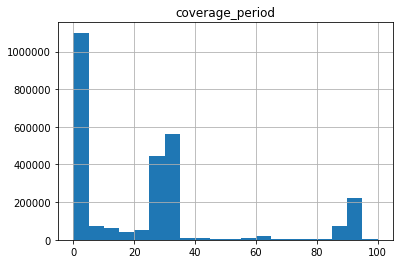

In [10]:
# histogram of coverage periods 
df["coverage_period"] =df["coverage_period"].dt.days
dfnew = df.loc[(df["coverage_period"] >=0) & (df["coverage_period"] <=100), : ]
dfnew.hist(column= ["coverage_period"], bins=20)

question 9. Graphic of total expensen in each year considering quarters.

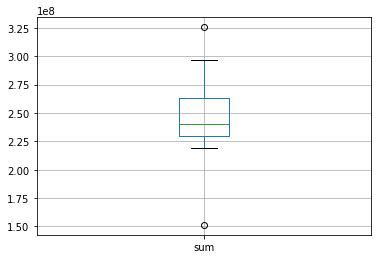

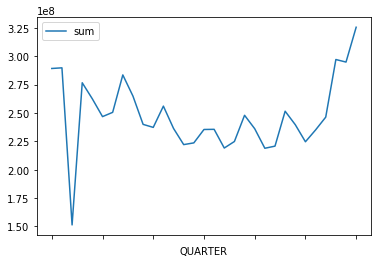

In [45]:
quarterly = df.groupby(["QUARTER"])["AMOUNT"].aggregate(["sum"])


dfquarterly = pd.DataFrame(quarterly)
#dfquarterly.index
quarterly.boxplot()
quarterly.plot(x=dfquarterly.index)






question 10. Graphic of comparing the expense of each office during year... (can be lines for each office)
11. Changes in aggregate House expenditures (arranged by 2009 expenditure size)
12. Changes in staffing force, by position (for 20 most expensive positions by total expenditures, arranged from biggest decline to biggest gain)
13. 